In [5]:
import pandas as pd
import numpy as np
import warnings

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder


from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,precision_score, recall_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

In [6]:
warnings.filterwarnings('ignore')

In [7]:
data = pd.read_csv('/content/HR_Dataset.csv')

In [8]:
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
394,0.42,0.56,2,133,3,0,1,0,sales,low
11843,0.62,0.61,3,266,2,0,0,0,management,high
2655,0.58,0.97,5,202,2,0,0,0,IT,low
10753,0.60,0.86,6,247,6,0,0,0,product_mng,medium
8523,0.47,0.55,5,207,3,0,0,0,support,low


In [9]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [10]:
data.rename(columns={'Departments ':'departments'},inplace=True)

In [11]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [12]:
data.shape

(14999, 10)

### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Get Overall Statistics About The Dataset

In [14]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check Null Values In The Dataset

In [15]:
data.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
departments,0
salary,0


### Taking Care of Duplicate Values

In [16]:
data.duplicated().any()

True

In [17]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
data = data.drop_duplicates()

In [19]:
data.shape

(11991, 10)

In [20]:
14999 - 11991

3008

<Axes: xlabel='left'>

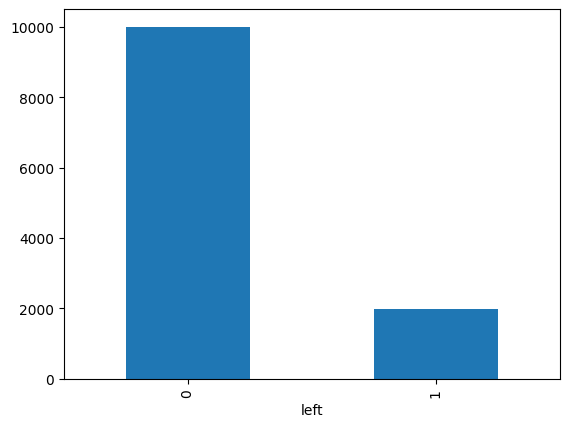

In [21]:
data['left'].value_counts().plot(kind='bar')

### Store Feature Matrix In X and Response(Target) In Vector y

In [22]:
X = data.drop(columns=['left'])

In [23]:
y = data['left']

In [24]:
y

,left
0,1
1,1
2,1
3,1
4,1
...,...
11995,0
11996,0
11997,0
11998,0


### Column Transformer and Pipeline

In [25]:
data.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


In [26]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [27]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())

])

In [28]:
from sklearn import set_config

In [29]:
set_config(display='diagram')

In [30]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

### Splitting The Dataset Into The Training Set And Test Set

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [32]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [33]:
y_pred = pipeline.predict(X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.8370154230929554

In [35]:
precision_score(y_test,y_pred)

0.5209580838323353

In [36]:
recall_score(y_test,y_pred)

0.2185929648241206

In [37]:
def model_scorer(model_name,model):

    output=[]

    output.append(model_name)

    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])

    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

    pipeline.fit(X_train,y_train)

    y_pred = pipeline.predict(X_test)

    output.append(accuracy_score(y_test,y_pred))

    output.append(precision_score(y_test,y_pred))

    output.append(recall_score(y_test,y_pred))

    return output

In [38]:
model_dict={
    'log':LogisticRegression(),
    'decision_tree':DecisionTreeClassifier(),
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()

}

In [39]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [40]:
model_output

[['log', 0.8370154230929554, 0.5209580838323353, 0.2185929648241206],
 ['decision_tree', 0.9704043351396415, 0.8978102189781022, 0.9271356783919598],
 ['random_forest', 0.9862442684451855, 0.9892761394101877, 0.9271356783919598],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [41]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])


],remainder='passthrough')

In [42]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())

])

In [43]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [44]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'


},index=[0])

In [45]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### Save The Model

In [46]:
import pickle

In [47]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [48]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [49]:
result = pipeline_saved.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### GUI - 1

### GUI - 2